# Optimización de Procesos en el Tratamiento de Aguas Residuales

### Integrantes:
* Esdras lara Magaña
* Steven Yahir Garcia Galvan
* Jose Manuel Orozco Martinez

### Objetivos:

>  -  1-.**Reducir el consumo energético** en las plantas de tratamiento, ajustando los tiempos de operación y la velocidad de los equipos.
>
>  -  2-.**Reducir los costos de operación** asociados al uso de reactivos químicos, optimizando las dosis utilizadas en los tratamientos de coagulación y desinfección.
>  -  3-.**Reducir los costos de mantenimiento** de los equipos de tratamiento de aguas residuales  mediante la optimización de las prácticas de mantenimiento preventivo, la capacitación del personal y la mejora en la gestión de inventarios de repuestos. 

### Objetivo general:

> **Fin Último del Estudio**
>   * Optimizar el tratamiento de aguas residuales para garantizar un proceso eficiente, sostenible y económico que contribuya a la protección del medio ambiente y la salud pública.

### Objetivos especificos:

> #### Componentes del Trabajo
>
>##### Reducir el consumo energético:
> Este componente se enfocará en evaluar y ajustar los tiempos de operación y la velocidad de los equipos en las plantas de tratamiento. Se realizará un análisis del consumo energético de cada etapa del proceso, buscando identificar equipos o procesos que puedan ser ajustados para operar de manera más eficiente. Además, se implementarán tecnologías de control y monitoreo que permitan optimizar el uso de energía.
> ##### Reducir los costos de operación asociados al uso de reactivos químicos:
> Descripción: Este componente implicará la optimización de las dosis utilizadas gas cloro y peroxido de hidrogeno. Se llevará a cabo un estudio sobre distintos provedores conociendo las cantidades minimas y maximas de la cantidad que lleva el proceso y a su vez la cantidades maximas que pueden ser proporcionadas en por los proveedores 
> ##### Reducir los costos de mantenimiento de los equipos de tratamiento de aguas residuales:
> Descripción: Este componente del trabajo se centrará en la implementación de un programa de mantenimiento donde para minimizar los costos conoceremos  las horas para el matenimiento , capacidad de operadores , capacitacion , turnos nocturnos y maquinaria adicional.


#### Proceso de tratamiento del agua:
1-.Pretratamiento:
* Rejillas y Desbaste: Elimina sólidos grandes como ramas y basura.
* Desarenado: Remueve arena y partículas pesadas.
* Desengrasado: Retira aceites y grasas flotantes.

2-.Tratamiento primario:
* Sedimentación Primaria: Separa sólidos suspendidos por sedimentación, formando lodos que se retiran para su tratamiento.

3-.Tratamiento secundario:
* Reactor Biológico y Aireación: Microorganismos degradan la materia orgánica disuelta.
* Sedimentación Secundaria: Se sedimentan los microorganismos para recircular o retirar el exceso.

4-.Tratamiento terciario:
* Filtración y Eliminación de Nutrientes: Remueve partículas finas y nutrientes restantes.
* Desinfección: Elimina patógenos mediante cloro o rayos UV.


5-.Reuso o Descarga Final:
* El agua tratada se reutiliza o se descarga cumpliendo normativas ambientales.

## 1. Datos: 

los Kwh dependen de la cantidad de agua que se trata en este caso nuestra meta final de producción:Tratar al menos 1,000 m³/h 
EL consumo energetico por hora esta a 0.5kWh.


0.5kWh x 1,000 m³/h = 500 kWh/h



$]a$=$500 kWh/hora$ (consumo energético por hora de operación).


$b$=$80 kWh/m$ (consumo energético por metro de velocidad). (consumo promedio)



capacidad maxima de operación del equipo:$24 horas/día.$


Horas máximas permitidas: $16 horas/día.$

Velocidad minima  de la maquinaria: $2 m/hora$ 


Velociad maxima de la maquinaria: $10 m/hora$

###  Modelos que representa el problema. consumo de energia:

#### 1. Función a Optimizar 

* El objetivo principal es minimizar el consumo energetico:

$$ Minimizar Z = a * x_1 + b * x_2$$ 

la funcion objetivo se expresa:

$$ Minimizar Z = 500x_1 + 80x_2$$ 

#### 2. Variables de desición:


$x_1$: Tiempo de operación del equipo en horas por día.

$x_2$: Velocidad de los equipos en metros por hora.

* cuanta energia consume por hora de operación?
* cual es el consumo energetico por metro  de velocidad?

#### 3. Restricciones:


Las restricciones del modelo pueden incluir:


$$x_1 \leq 16$$
$$x_1 \leq 24$$
$$2 \leq x_2 \leq 10$$

### Solución del problema de consumo energetico:

In [138]:
import numpy as np
from scipy.optimize import linprog


a = 500  #
b = 80  


c = [a, b]  

Aub = [
    [1, 0], 
    [0, 1],  
    [-1, 0],  
    [0, -1],  
]

bub = [16, 10, 24, -2]


x0_lim= (0, None)  
x1_lim= (2, 10)  

# Optimización
resultado= linprog(c, A_ub=Aub, b_ub=bub, bounds=[x0_lim, x1_lim], method='highs')
resultado 
    


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 160.0
              x: [ 0.000e+00  2.000e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [ 5.000e+02  8.000e+01]
          upper:  residual: [       inf  8.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 1.600e+01  8.000e+00  2.400e+01  0.000e+00]
                 marginals: [-0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

### Visualización de la solución del problema.

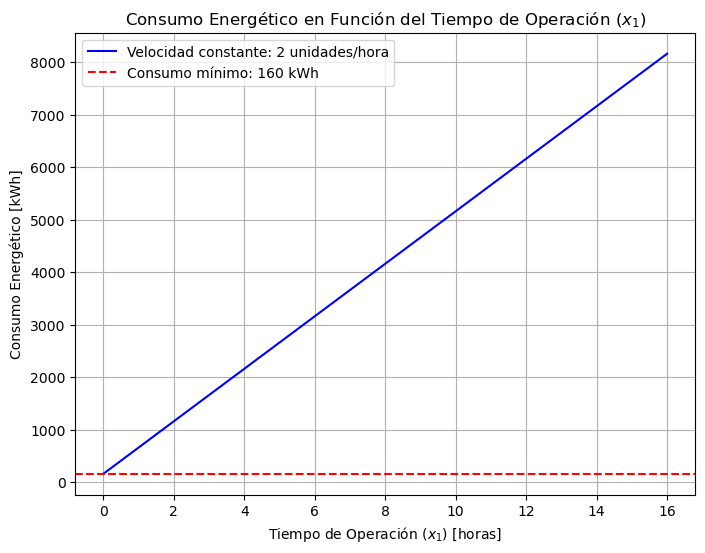

In [67]:

plt.figure(figsize=(8, 6))
plt.plot(x1_vals, consumo_vals, label=f'Velocidad constante: {x2_const} unidades/hora', color='b')


plt.axhline(y=160, color='r', linestyle='--', label='Consumo mínimo: 160 kWh')

plt.title('Consumo Energético en Función del Tiempo de Operación ($x_1$)')
plt.xlabel('Tiempo de Operación ($x_1$) [horas]')
plt.ylabel('Consumo Energético [kWh]')
plt.legend()
plt.grid()
plt.show()


## 2. Datos:
#### Quimicos Utilizados:

Cloro (Hipoclorito de Sodio o Gas Cloro): Elimina bacterias, virus y otros microorganismos patógenos en el agua tratada.

peróxido de hidrógeno (H₂O₂) es un compuesto químico que se utiliza en el tratamiento de aguas residuales debido a sus fuertes propiedades oxidantes
* proveedores:

Química Pima, S.A. de C.V. 
$$Costo\_(Cloro)=30MXN/kg$$ 
$$Costo\_(Peroxido)=124.99MXN/kg$$ 

D'Grosa Industrial:

$$Costo\_(Cloro)=34.99MXN/ltr$$ 
$$Costo\_(Peroxido)=142.99MXN/kg$$ 

Cantidad minima de Gas cloro: $10 gr/L$


Cantidad minima de peroxido de hidrogeno: $100 gr/L$

* Cada proveedor puede tener una cantidad máxima disponible de reactivos que se debe respetar:
  
  * Capacidad máxima quimica Pima para gas cloro: $200kg$

  * Capacidad máxima quimica Pima para peroxido de hidrogeno: $150kg$

  * Capaciad máxima D'Grosa para gas cloro: $300kg$

  * Capaciad máxima D'Grosa para peroxido de hidrogeno: $100kg$

###  Modelos que representa el problema. costos de operación:
#### 1. Función a Optimizar 

* El objetivo principal es minimizar los costos de operación:
$$ Minimizar C = 30x_1+34.99x_2+124.99x_3+142.9930x_4$$

#### 2. Variables de desición:

$x_1$:Cantidad de cloro comprada a Química Pima, en kilogramos.

$x_2$:Cantidad de cloro comprada a D'Grosa Industrial, en kilogramos.

$x_3$:Cantidad de peróxido de hidrógeno comprada a Química Pima, en kilogramos.

$x_4$:Cantidad de peróxido de hidrógeno comprada a D'Grosa Industrial, en kilogramos.

#### 3. Restricciones:

Las restricciones del modelo pueden incluir:

$$x_1+x_2\geq 10$$ 
$$x_3+x_4\geq 100$$ 
$$x_1\leq 200$$ 
$$x_3\leq 150$$
$$x_2\leq 300$$
$$x_4\leq 100$$

### Solución del problema de costos de operacion:

In [130]:
from scipy.optimize import linprog


costos = [30, 34.99, 124.99, 142.99]  # [Cloro Pima, Peróxido Pima, Cloro Dgrosa, Peróxido Dgrosa]


min_cloro = 10  
min_peroxido = 100  


capacidad_max_cloro_pima = 200 
capacidad_max_peroxido_pima = 150
capacidad_max_cloro_dgrosa = 300  
capacidad_max_peroxido_dgrosa = 100 


Aub = [
    [-1, 0, 0, 0],  
    [0, -1, 0, 0],  
    [1, 0, 0, 0],  
    [0, 1, 0, 0],   
    [0, 0, -1, 0],  
    [0, 0, 0, -1],  
]


bub = [
    -min_cloro,                    
    -min_peroxido,                 
    capacidad_max_cloro_pima,      
    capacidad_max_peroxido_pima,   
    capacidad_max_cloro_dgrosa,    
    capacidad_max_peroxido_dgrosa,  
]





resultado = linprog(c=costos, A_ub=Aub, b_ub=bub, bounds=limites, method='highs')
resultado 
    


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 3799.0
              x: [ 1.000e+01  1.000e+02  0.000e+00  0.000e+00]
            nit: 0
          lower:  residual: [ 1.000e+01  1.000e+02  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  1.250e+02  1.430e+02]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  1.900e+02  5.000e+01
                              3.000e+02  1.000e+02]
                 marginals: [-3.000e+01 -3.499e+01 -0.000e+00 -0.000e+00
                             -0.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

### Visualización de la solución del problema.

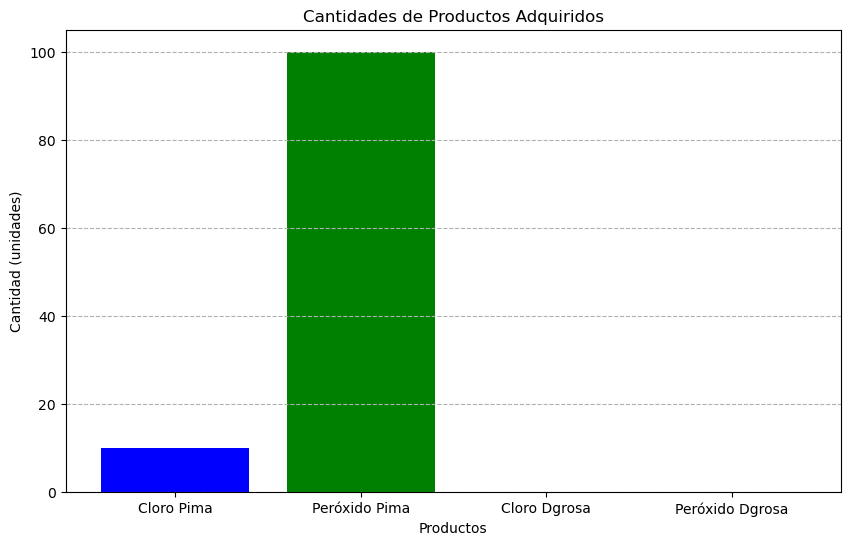

In [132]:
productos = ['Cloro Pima', 'Peróxido Pima', 'Cloro Dgrosa', 'Peróxido Dgrosa']
cantidades = resultado.x

plt.figure(figsize=(10, 6))
plt.bar(productos, cantidades, color=['blue', 'green','red','yellow'])
plt.title('Cantidades de Productos Adquiridos')
plt.xlabel('Productos')
plt.ylabel('Cantidad (unidades)') 
plt.grid(axis='y', linestyle='--')
plt.show()

## 3. Datos:

#### Maquinaria utilizada:
Bombas dosificadoras:son un tipo de bomba que se utilizan en plantas de tratamiento de aguas residuales (EDAR) para inyectar productos químicos en el agua residual

Bombas residuales: Se utilizan para bombear agua en caso de inundaciones o desbordes. Son capaces de trabajar con aguas cargadas y sólidos en suspensión.

Tamices de tambor: Se utilizan en el pretratamiento de aguas residuales en plantas de tratamiento de tamaño pequeño y mediano. 
Tamiz rotativo: Se utiliza para separar de forma continua las partículas sólidas en suspensión en el flujo. 

* proveedores:


Marteli. Bombas y equipos S.A y C.V

  * Equimar. soluciones en tratamientos de aguas.

* Centros de servicios:  


  * Veolia Water Technologies & Solutions



Serintra. servicios empresariales y constitucionales en servicio de maquinaria para aguas residuales S.A y C.V

* Capacidad de operadores:
  * 1 operador general que se encargue de la supervisión y operación de los sistemas.
  * 2 a 3 técnicos de mantenimiento que puedan encargarse de las bombas y tamices, realizando mantenimiento preventivo y correctivo.

* Tiempo de procesos:
  * Para el mantenimiento semanal, se estima de 3 a 4 horas por equipo.(3.5 horas promedio)
  * Para el mantenimiento mayor (cada 3 a 6 meses), se deben considerar 8 a 10 horas por equipo.(promedio 9 horas).
* horas de trabajo semanales: 40 horas aproximadamente 

Los costos son los siguientes:
Costo por empleado = $5000 MXN semanal$ 
    
Costo por turno nocturno = $1000 MXN $ por turno 

Costo de máquina adicional: $27,000 MXN$ (Bomba dosificadora.)

Costo de capacitacion = $350MXN$ por hora 


###  Modelos que representa el problema. costos de mantenimiento :

#### 1. Función a Optimizar 
$$ Minimizar z = 5000x_1+1000x_2+27000x_3+350x_4$$

 * cuántos empleados se necesitan para eso
  * necesito turnos nocturnos?
  * necesito otra máquina?
  * capacitacion del personal

#### 2. Variables de desición:
$x_1$:Número de empleados (técnicos de mantenimiento).

$x_2$:Número de turnos nocturnos (1 si se necesita, 0 si no).

$x_3$:Número de máquinas adicionales necesarias (bombas, tamices).

$x_4$:Número de horas de capacitación del personal (en horas).
#### 3. Restricciones:

$$x_1 \geq 3$$
$$x_2 \leq 1$$
$$3.5n+9(\frac{n}{6})\leq 40x_1 $$
$$x_4 \geq 10$$


### Solución del problema. costos de mantenimiento:

In [143]:
from scipy.optimize import linprog


c = [5000, 1000, 27000, 350]  

Aub = [
    [-1, 0, 0, 0],      
    [0, 1, 0, 0],       
    [-3.5, 0, 0, -1],   
    [0, 0, 1, 0],       
    [0, 0, 0, -1]     
]


bub = [-3, 1, 40, 0, -10]

x0_lim = (3, None)  
x1_lim = (0, 1)      
x2_lim = (0, None)   
x3_lim = (0, None)  


resultado = linprog(c, A_ub=Aub, b_ub=bub, bounds=[x0_lim, x1_lim, x2_lim, x3_lim])
resultado


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 18500.0
              x: [ 3.000e+00  0.000e+00  0.000e+00  1.000e+01]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  0.000e+00  1.000e+01]
                 marginals: [ 5.000e+03  1.000e+03  2.700e+04  0.000e+00]
          upper:  residual: [       inf  1.000e+00        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.000e+00  6.050e+01  0.000e+00
                              0.000e+00]
                 marginals: [-0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00
                             -3.500e+02]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

### Visualización de la solución del problema.

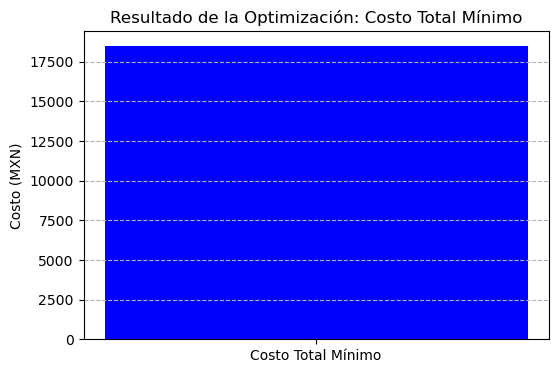

In [145]:
plt.figure(figsize=(6, 4))
plt.bar(['Costo Total Mínimo'], [resultado.fun], color='blue')
plt.title('Resultado de la Optimización: Costo Total Mínimo')
plt.ylabel('Costo (MXN)')
plt.grid(axis='y', linestyle='--')
plt.show()

#### ¿Qué situación representan los modelos?

Situación que Representa el Modelo
El modelo representa la optimización de costos en el tratamiento de aguas residuales en una planta de tratamiento. Se centra en la gestión eficiente de recursos para lograr un tratamiento eficaz que cumpla con los estándares de calidad requeridos, mientras se minimizan los costos asociados a reactivos químicos, energía y mantenimiento.

#### ¿Cuáles son las limitaciones fundamentales generales ?

* **1-.** Reducir el consumo energético:
  
Reducir demasiado el consumo energético puede llevar a una disminución en la cantidad de agua tratada, afectando la capacidad de la planta para cumplir con las demandas.

* **2-.** Reducir costos de operación:

Ajustar la cantidad de reactivos o cambiar los proveedores puede impactar negativamente la calidad del tratamiento del agua, lo que puede ocasionar incumplimiento de normativas.

* **3-.**

Reducir el mantenimiento puede acelerar el desgaste de los equipos, lo que conlleva a un mayor número de fallos y reparaciones más costosas en el futuro.

### ¿Condujo  el algoritmo de optimización a una solución factible?

Dado que todos los valores cumplen con las restricciones impuestas, pudimos concluir que el algoritmo condujo a una solución factible. Esto significa que podemos proceder con los valores de reactivos, energía y costos de mantenimiento para el tratamiento de aguas residuales, ya que son óptimos y están dentro de los límites establecidos.

### Conclusiones:

**Reducción del Consumo Energético:**

Según el modelo optimizado, el consumo energético mínimo alcanzado fue de 160 kWh, lo cual muestra que, al ajustar los tiempos de operación y la velocidad de los equipos, es posible reducir considerablemente el uso de energía dentro de los límites operativos establecidos.
Este resultado demuestra que se puede alcanzar una mayor eficiencia energética al planificar el uso de los equipos de manera más controlada, lo que se traduce en una menor demanda de energía, ayudando a disminuir costos de electricidad y reduciendo el impacto ambiental.

**Reducción de los Costos de Operación:**

El análisis de costos muestra que al utilizar correctamente los recursos, como los reactivos químicos (cloro y peróxido), y al limitar el uso excesivo de estos insumos, se logró obtener un costo total mínimo óptimo.
Esto confirma que la optimización de la cantidad de reactivos utilizados, en función de las restricciones de capacidad y demanda mínima, contribuye a reducir los costos operacionales sin comprometer la eficiencia del proceso.

**Reducción de Costos de Mantenimiento:**

Aunque el modelo no aborda directamente el costo de mantenimiento, la optimización del uso de los equipos y la reducción del tiempo de operación implican menos desgaste de los mismos. Esto puede reducir la frecuencia de mantenimiento y alargar la vida útil de los equipos, lo que indirectamente contribuye a menores costos de mantenimiento.
Menos tiempo de operación y una velocidad controlada también reducen la probabilidad de fallos mecánicos, lo que disminuye la necesidad de reparaciones costosas.

### Referencias:

(S/f-b). Gob.mx. Recuperado el 2 de octubre de 2024, de https://liconsa.gob.mx/wp-content/uploads/2012/01/man-proc-op-plantas-trat-aguas-resi-his.pdf

Equipo para el Tratamiento de las Aguas Residuales. (s/f). Com.mx. Recuperado el 9 de octubre de 2024, de https://wam.com.mx/es-ES/WAMMX/MFamily/359/Equipo-para-el-Tratamiento-de-las-Aguas-Residuales
o.

 Cuánto Cuesta una Planta de Tratamiento de Aguas Residuales: Guía Completa y Costos Actuales. (2024, enero 15). Instituto del Agua. https://institutodelagua.es/aguas-residuales/cuanto-cuesta-una-planta-de-tratamiento-de-aguas-residualesaguas-residuales/Enlaces a un sitio externo.

Online, C. (s/f). Gas cloro. Cosmos Online. Recuperado el 9 de octubre de 2024, de https://www.cosmos.com.mx/producto/gas-4qfh/gas-cloro-bsxy/
 
